# Prepare the Classification model using SVM for Salary Data

In [98]:
# install the package

!pip install imblearn


In [99]:
# Import the necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score



In [100]:
# Remove warnings

import warnings
warnings.filterwarnings("ignore")

In [101]:
# Read the Training and Testing Datasets

train_data=pd.read_csv("SalaryData_Test(1).csv")
test_data=pd.read_csv("SalaryData_Train(1).csv")


In [102]:
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [103]:
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [104]:
# Display first 5 rows of train_data

train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [105]:
# Display first 5 rows of test_data

test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [106]:
# number of rows and columns of both datasets

print(train_data.shape)
print(test_data.shape)


(15060, 14)
(30161, 14)


In [107]:
# Statistical information of the train_data

train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [108]:
# Statistical information of the test_data

test_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [109]:
# information of train_data

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [110]:
# information of the test_data

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [111]:
# skewness of train_data

train_data.skew()

age              0.536112
educationno     -0.320999
capitalgain     11.570156
capitalloss      4.496738
hoursperweek     0.359502
dtype: float64

In [112]:
# skewness of test_data

test_data.skew()

age              0.530180
educationno     -0.305378
capitalgain     11.902483
capitalloss      4.528238
hoursperweek     0.330856
dtype: float64

In [113]:
# kurtosis of train_data

train_data.kurt()

age              -0.181312
educationno       0.618468
capitalgain     143.591390
capitalloss      19.080685
hoursperweek      3.267311
dtype: float64

In [114]:
# kurtosis of test_data

test_data.kurt()

age              -0.144760
educationno       0.643605
capitalgain     153.661174
capitalloss      19.529284
hoursperweek      3.167683
dtype: float64

In [115]:
# Correrlation of train_data

train_data.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


In [116]:
# correlation of test_data

test_data.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


In [117]:
# missing values

train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [118]:
# missing values

test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

 # Visualisations

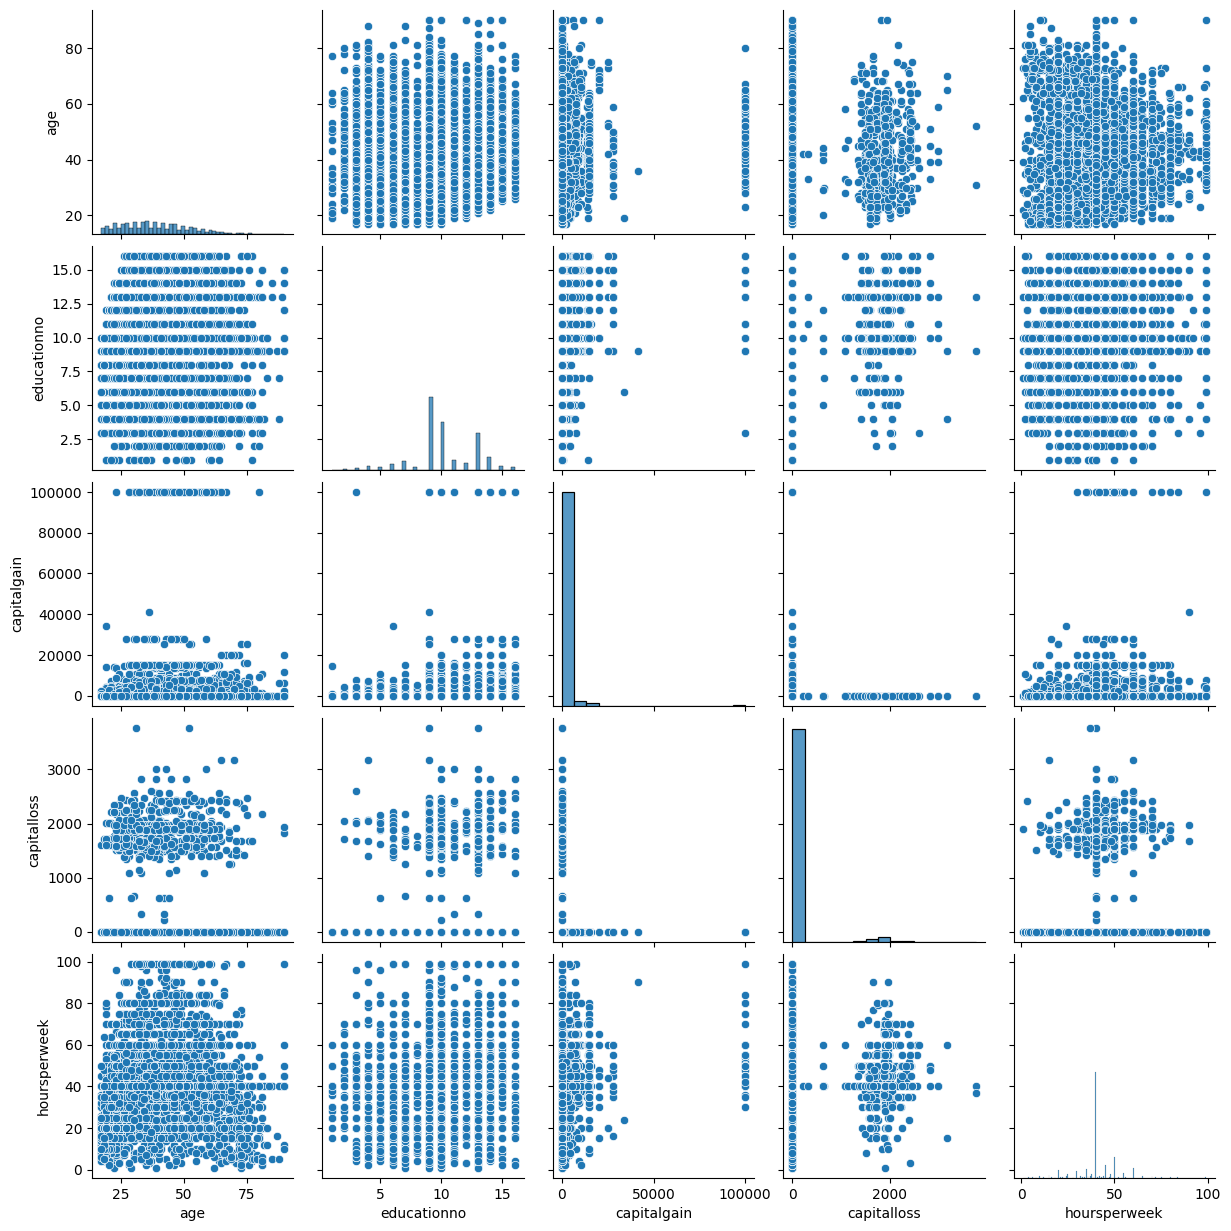

In [119]:
# Pairplot

sns.pairplot(train_data)
plt.show()

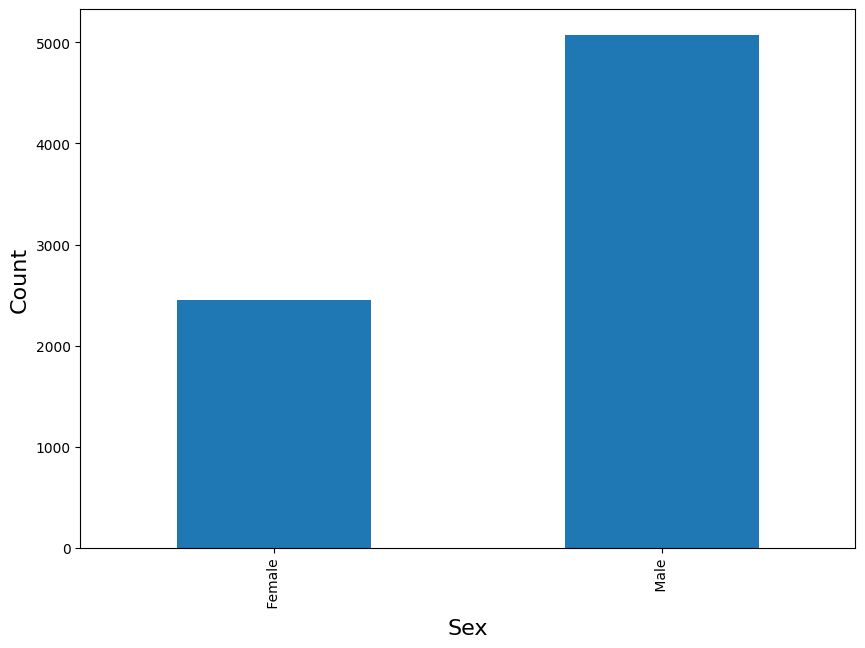

In [120]:
# Barplot

plt.figure(figsize=(10,7))
pd.crosstab(train_data['Salary'],train_data['sex']).mean().plot(kind='bar')
plt.xlabel('Sex', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

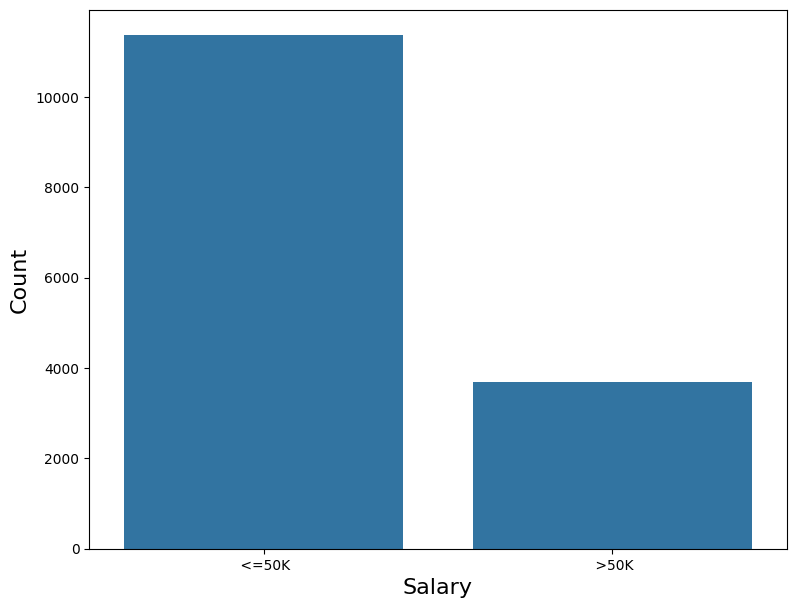

In [121]:
# Countplot

plt.figure(figsize=(9,7))
sns.countplot(x='Salary', data= train_data)
plt.xlabel('Salary', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

Text(0, 0.5, 'Count')

<Figure size 1400x700 with 0 Axes>

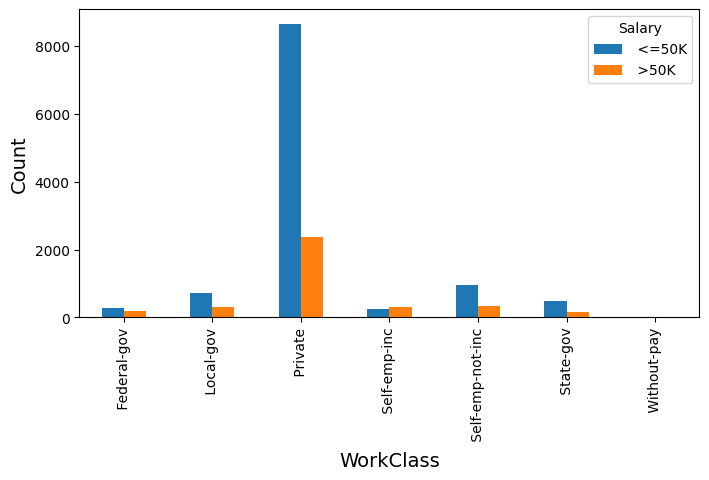

In [122]:
plt.figure(figsize=(14,7))
pd.crosstab(train_data.workclass,train_data.Salary).plot(kind="bar")
plt.xlabel("WorkClass",fontsize=14)
plt.ylabel("Count",fontsize=14)

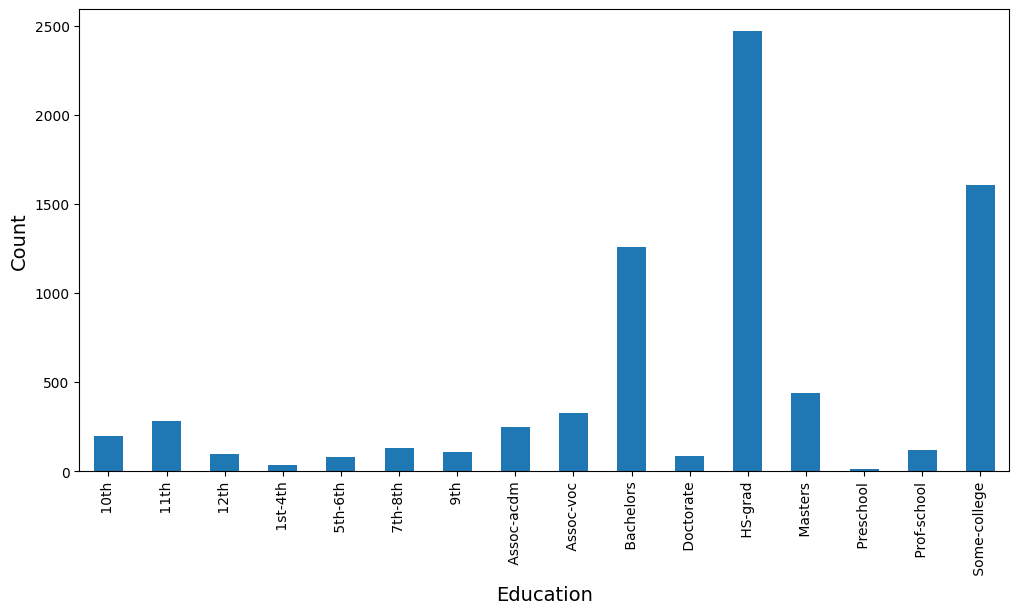

In [123]:
plt.figure(figsize=(12,6))
pd.crosstab(train_data["Salary"],train_data["education"]).mean().plot(kind="bar")
plt.xlabel("Education",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.show()

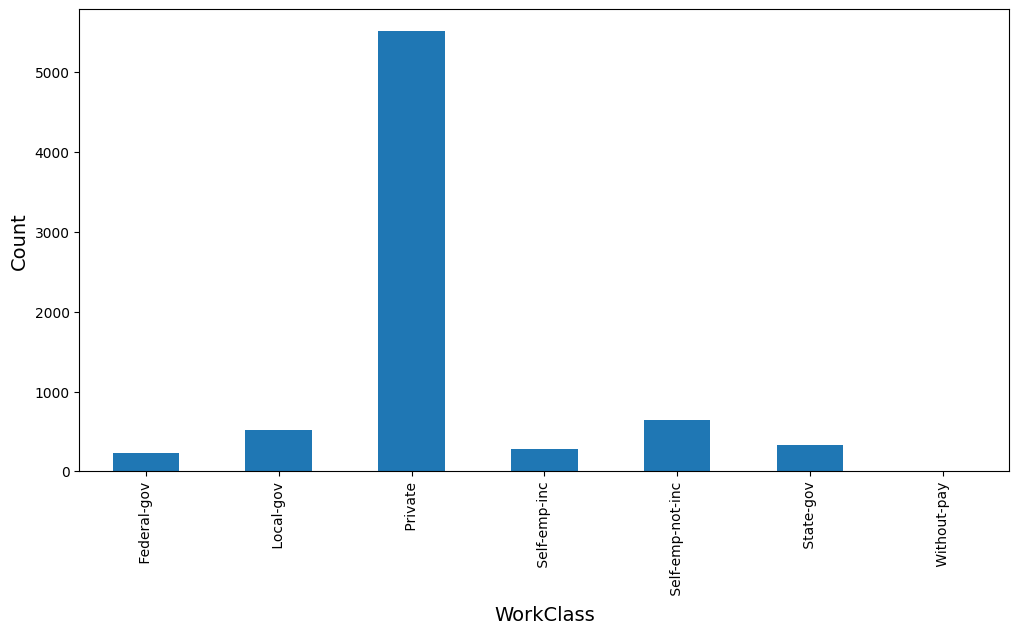

In [124]:
plt.figure(figsize=(12,6))
pd.crosstab(train_data["Salary"],train_data["workclass"]).mean().plot(kind="bar")
plt.xlabel("WorkClass",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.show()

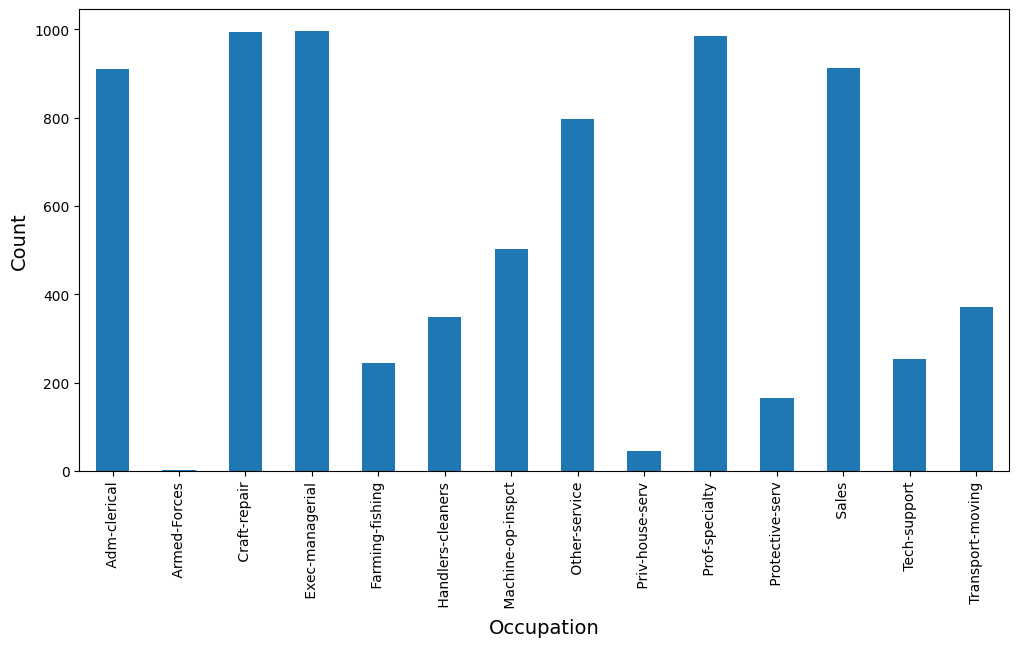

In [125]:
plt.figure(figsize=(12,6))
pd.crosstab(train_data['Salary'],train_data['occupation']).mean().plot(kind='bar')
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

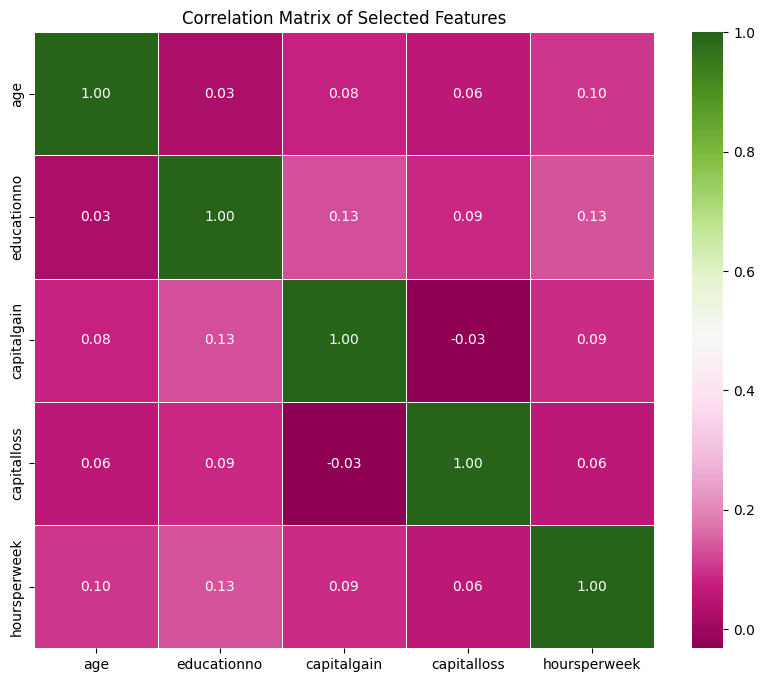

In [126]:
# Assuming 'train_data' is your DataFrame
selected_features = ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']
subset_corr = train_data[selected_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with annotations
sns.heatmap(subset_corr, annot=True, cmap='PiYG', fmt=".2f", linewidths=.5)

# Display the plot
plt.title('Correlation Matrix of Selected Features')
plt.show()

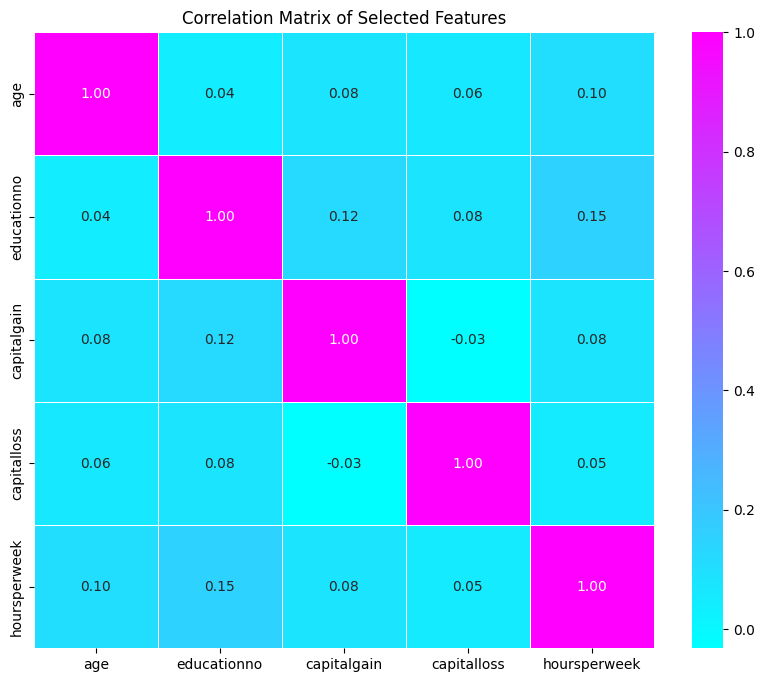

In [127]:
# Assuming 'train_data' is your DataFrame
selected_features = ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']
subset_corr = test_data[selected_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with annotations
sns.heatmap(subset_corr, annot=True, cmap='cool', fmt=".2f", linewidths=.5)

# Display the plot
plt.title('Correlation Matrix of Selected Features')
plt.show()

# Detecting Outliers


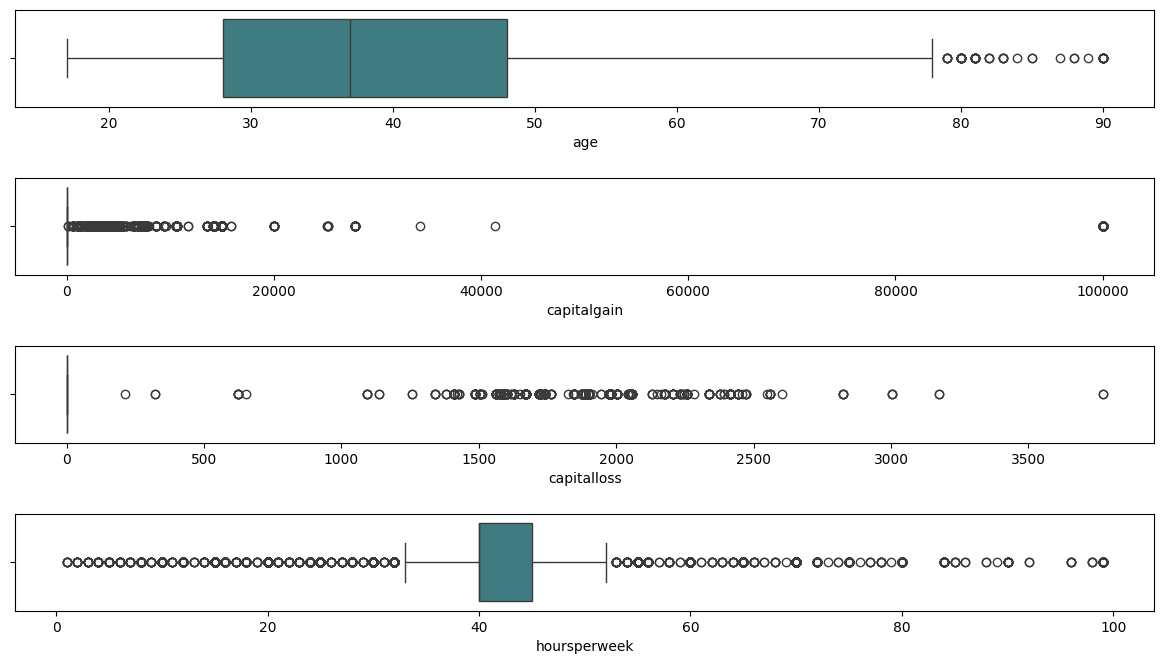

In [128]:
outlier1=train_data.copy()
fig,axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x="age",data=outlier1,palette="crest",ax=axes[0])
sns.boxplot(x="capitalgain",data=outlier1,palette="crest",ax=axes[1])
sns.boxplot(x="capitalloss",data=outlier1,palette="crest",ax=axes[2])
sns.boxplot(x="hoursperweek",data=outlier1,palette="crest",ax=axes[3])
plt.tight_layout(pad=2.0)

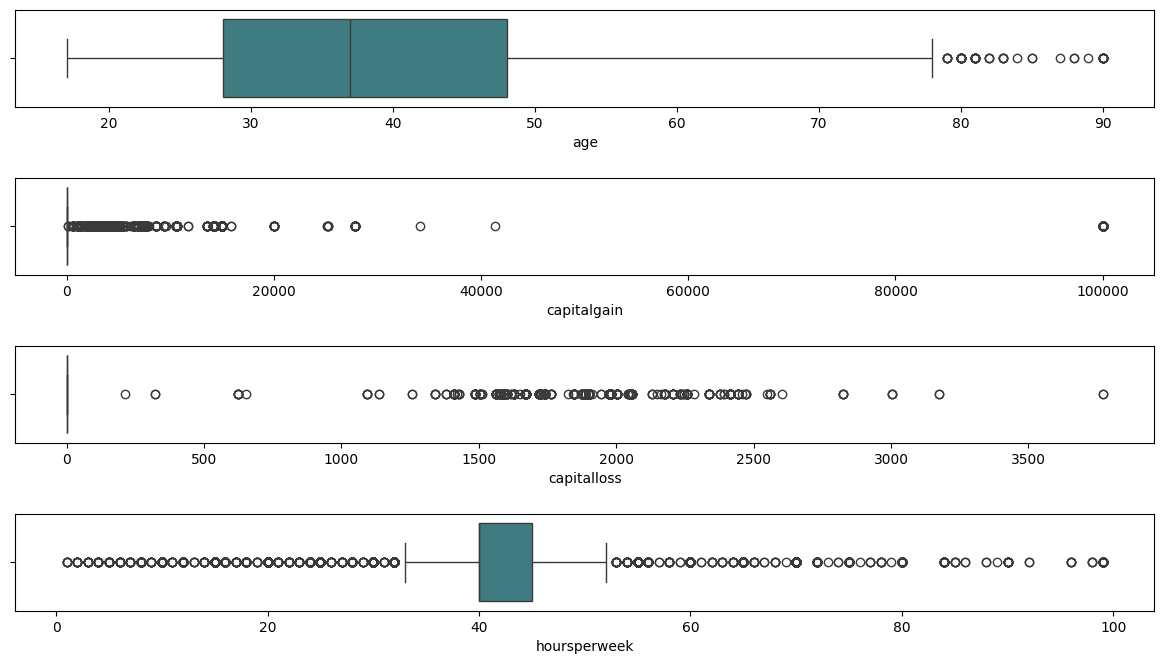

In [129]:
outlier2=test_data.copy()
fig,axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x="age",data=outlier1,palette="crest",ax=axes[0])
sns.boxplot(x="capitalgain",data=outlier1,palette="crest",ax=axes[1])
sns.boxplot(x="capitalloss",data=outlier1,palette="crest",ax=axes[2])
sns.boxplot(x="hoursperweek",data=outlier1,palette="crest",ax=axes[3])
plt.tight_layout(pad=2.0)

# Data Preprocessing

In [130]:
le=LabelEncoder()
train_data["workclass"]=le.fit_transform(train_data["workclass"])
train_data["education"]=le.fit_transform(train_data["education"])
train_data["maritalstatus"]=le.fit_transform(train_data["maritalstatus"])
train_data["occupation"]=le.fit_transform(train_data["occupation"])
train_data["relationship"]=le.fit_transform(train_data["relationship"])
train_data["race"]=le.fit_transform(train_data["race"])
train_data["sex"]=le.fit_transform(train_data["sex"])
train_data["native"]=le.fit_transform(train_data["native"])
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [131]:
train_data["Salary"]=[0 if i.strip()=="<=50k" else 1 for i in train_data["Salary"]]


In [132]:
train_data["Salary"]

0        1
1        1
2        1
3        1
4        1
        ..
15055    1
15056    1
15057    1
15058    1
15059    1
Name: Salary, Length: 15060, dtype: int64

In [133]:
le=LabelEncoder()
test_data["workclass"]=le.fit_transform(test_data["workclass"])
test_data["education"]=le.fit_transform(test_data["education"])
test_data["maritalstatus"]=le.fit_transform(test_data["maritalstatus"])
test_data["occupation"]=le.fit_transform(test_data["occupation"])
test_data["relationship"]=le.fit_transform(test_data["relationship"])
test_data["race"]=le.fit_transform(test_data["race"])
test_data["sex"]=le.fit_transform(test_data["sex"])
test_data["native"]=le.fit_transform(test_data["native"])
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [134]:
test_data["Salary"]=[0 if i.strip()=="<=50k" else 1 for i in test_data["Salary"]]

In [135]:
test_data["Salary"]

0        1
1        1
2        1
3        1
4        1
        ..
30156    1
30157    1
30158    1
30159    1
30160    1
Name: Salary, Length: 30161, dtype: int64

In [136]:
##Capturing the column names which can help in futher process
colnames = train_data.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [137]:
# Splitting the data

x_train = train_data[colnames[0:13]]
y_train = train_data[colnames[13]]
x_test = test_data[colnames[0:13]]
y_test = test_data[colnames[13]]

In [138]:
# Normalmization

def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [139]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

# Accuracy of the model


In [140]:
# Assuming you have features X and labels y
# Replace this with your actual data
X, y = np.random.rand(100, 10), np.random.choice([0, 1], 100)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM classifier with a linear kernel
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Test Accuracy =", acc)

# Print confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix_result)


Test Accuracy = 45.0
Confusion Matrix:
[[6 8]
 [3 3]]


In [141]:
# Assuming you have features X and labels y
# Replace this with your actual data
X, y = np.random.rand(100, 10), np.random.choice([0, 1], 100)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM classifier with a radial basis function (RBF) kernel
clf = SVC(kernel='rbf', C=1.0, gamma='auto')  # Experiment with different C and gamma values
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Test Accuracy =", acc)

# Print confusion matrix and classification report
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix_result)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy = 60.0
Confusion Matrix:
[[ 0  8]
 [ 0 12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.60      1.00      0.75        12

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.37        20
weighted avg       0.36      0.60      0.45        20



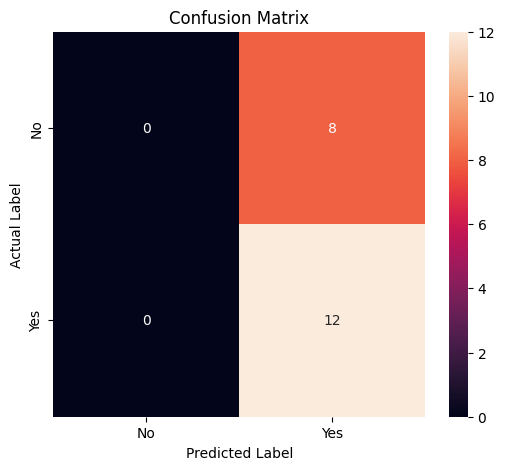

In [142]:
# plot confusion matrix to describe the performance of classifier.

cm_ff=confusion_matrix(y_test, y_pred)
class_label = ["No", "Yes"]
ff_cm = pd.DataFrame(cm_ff, index = class_label, columns = class_label)
plt.figure(figsize=(6, 5))
sns.heatmap(ff_cm, annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [143]:
#kernal=linear

clf1=SVC(kernel='linear',gamma=0.01) # kernel="linear","rbf","polynomial"

clf1.fit(x_train,y_train)

y_pred = clf1.predict(x_test)

acc = accuracy_score(y_test,y_pred)*100
print("Test Accuracy=",acc)

confusion_matrix(y_test, y_pred)

Test Accuracy= 45.0


array([[0, 8],
       [3, 9]])

In [144]:
#kernal=rbf

clf1=SVC(kernel='rbf',gamma=0.001) # kernel="linear","rbf","polynomial"

clf1.fit(x_train,y_train)

y_pred = clf1.predict(x_test)

acc = accuracy_score(y_test,y_pred)*100
print("Test Accuracy=",acc)

confusion_matrix(y_test, y_pred)

Test Accuracy= 60.0


array([[ 0,  8],
       [ 0, 12]])

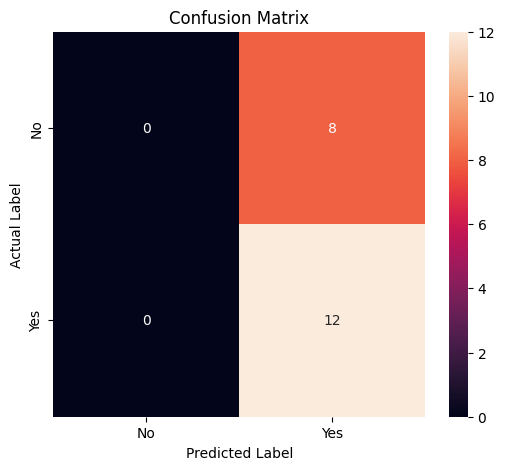

In [145]:
# plot confusion matrix to describe the performance of classifier.

cm_ff=confusion_matrix(y_test, y_pred)
class_label = ["No", "Yes"]
ff_cm = pd.DataFrame(cm_ff, index = class_label, columns = class_label)
plt.figure(figsize=(6, 5))
sns.heatmap(ff_cm, annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [146]:
#kernal=rbf

clf1=SVC(kernel='rbf',gamma=0.0001,C=1) # kernel="linear","rbf","polynomial"

clf1.fit(x_train,y_train)

y_pred = clf1.predict(x_test)

acc = accuracy_score(y_test,y_pred)*100
print("Test Accuracy=",acc)

confusion_matrix(y_test, y_pred)

Test Accuracy= 60.0


array([[ 0,  8],
       [ 0, 12]])